# Data Collection and Preprocessing

In [68]:
import pandas as pd
import numpy as np
import os
import utilities as utils
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances;
%matplotlib widget


In [2]:
names = []
with open('./names/names.txt', 'r') as f:
    names = [name.strip().replace(' ', '_').lower() for name in f.read().split(',')]

In [3]:
ids, labels = utils.generate_accession_ids('accession')

In [4]:
"""for id, label in zip(ids,labels):
    if not os.path.exists(f'dataset/{label}'):
        os.makedirs(f'dataset/{label}')
    with open(f'dataset/{label}/accession_ids.txt', 'a') as f:
        f.write(f'{id}\n')"""

"for id, label in zip(ids,labels):\n    if not os.path.exists(f'dataset/{label}'):\n        os.makedirs(f'dataset/{label}')\n    with open(f'dataset/{label}/accession_ids.txt', 'a') as f:\n        f.write(f'{id}\n')"

In [5]:
"""np.random.seed(20)
for dir in [dirr for dirr in os.listdir('dataset') if not dirr.startswith('.')]:
    accession_file = os.path.join('dataset', dir, "accession_ids.txt")
    with open(accession_file, 'r') as f:
        ids = np.random.choice([line.strip() for line in f], 50, replace=False)
    utils.download_fasta(ids, f'dataset/{dir}')"""

'np.random.seed(20)\nfor dir in [dirr for dirr in os.listdir(\'dataset\') if not dirr.startswith(\'.\')]:\n    accession_file = os.path.join(\'dataset\', dir, "accession_ids.txt")\n    with open(accession_file, \'r\') as f:\n        ids = np.random.choice([line.strip() for line in f], 50, replace=False)\n    utils.download_fasta(ids, f\'dataset/{dir}\')'

In [6]:
"""for dir in os.listdir('dataset'):
    if dir.startswith('.'):
        continue
    target = os.path.join('dataset', dir)
    for fasta in os.listdir(target):
        if fasta.startswith('.'):
            continue
        if not fasta.startswith('accession'):
            seq = utils.read_fasta(os.path.join(target, fasta))
            seq = utils.clean_fasta(seq)
            utils.write_fastas(seq, dir, target)"""

"for dir in os.listdir('dataset'):\n    if dir.startswith('.'):\n        continue\n    target = os.path.join('dataset', dir)\n    for fasta in os.listdir(target):\n        if fasta.startswith('.'):\n            continue\n        if not fasta.startswith('accession'):\n            seq = utils.read_fasta(os.path.join(target, fasta))\n            seq = utils.clean_fasta(seq)\n            utils.write_fastas(seq, dir, target)"

In [46]:
labels = []
cgr_mats = []
cgr_flattened = []
for dir1 in [dir for dir in os.listdir('dataset') if not dir.startswith('.')]:
    for file in os.listdir(os.path.join('dataset', dir1, dir1)):
        path_to_file = os.path.join('dataset',dir1,dir1,file)
        sequence = utils.read_sequence(path_to_file)
        if len(sequence) < 20000 or len(sequence) > 50000:
            continue
        tmp = utils.cgr(sequence, 'ACGT', 7)
        cgr_mats.append(tmp)
        labels.append(path_to_file.split('/')[1])
        cgr_flattened.append(tmp.flatten())

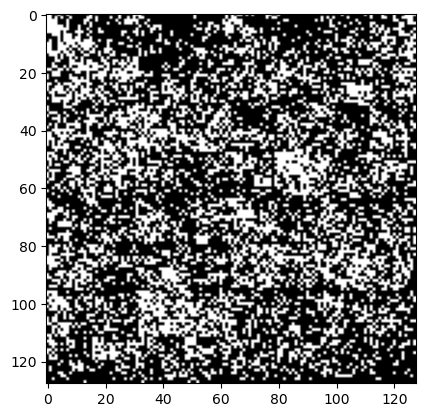

In [56]:
plt.imshow(np.where(np.array(cgr_mats[12]) !=0,1,0), cmap='gray_r')
plt.show()


In [61]:
np.array(cgr_mats).shape

(305, 128, 128)

In [84]:
D = pairwise_distances(cgr_flattened, metric='correlation')

In [63]:
np.all(np.diag(D) == 0)

True

In [64]:
np.all(D == D.T)

True

In [85]:
reduced = utils.perform_mds(D, 3, 0)

/Users/zeyadahmed/opt/miniconda3/envs/data_science/lib/python3.12/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [78]:
"""fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced.T[0][62:139],reduced.T[1][62:139],alpha=0.5, c=colors[0])
ax.scatter(reduced.T[0][139:],reduced.T[1][139:],alpha=0.5, c='b')
ax.scatter(reduced.T[0][:62],reduced.T[1][:62],alpha=0.5, c='g')


ax.set_xlabel('PCo1')
ax.set_ylabel('PCo2')
ax.set_zlabel('PCo3')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_title('Bacteria')
ax.legend()
plt.show()"""
gc.collect()

946

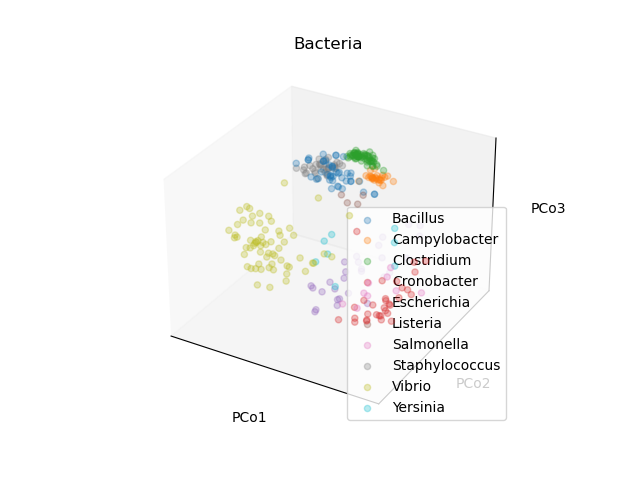

In [86]:
utils.plot_3d(reduced, np.array(labels))
plt.legend(loc='best', bbox_to_anchor=(1, 1))


In [67]:
np.unique(labels, return_counts=True)

(array(['Bacillus', 'Campylobacter', 'Clostridium', 'Cronobacter',
        'Escherichia', 'Listeria', 'Salmonella', 'Staphylococcus',
        'Vibrio', 'Yersinia'], dtype='<U14'),
 array([44, 26, 56, 31, 27,  4,  9, 35, 65,  8]))